In [22]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings("ignore")

import torch

import constant
import tools
import myplot
from models import model_evaluation, model_improvement

In [2]:
%load_ext autoreload

# Evaluation

## load evaluation data, models, features

In [4]:
path = "SH_SC_1/"

In [9]:
df_evl = pd.read_csv(constant.SH_SC_EVL_path)
df_evl["TIME_CET"] = pd.to_datetime(df_evl["TIME_CET"])

In [6]:
model_original = torch.load(constant.model_path + path + "original_model.pth")
model_wsr = torch.load(constant.model_path + path + "wsr_model.pth")
model_geo = torch.load(constant.model_path + path + "geo_model.pth")
model_semigeo = torch.load(constant.model_path + path + "semigeo_model.pth")

In [7]:
org_cols = ['Capacity_kw', 'Navhub_height', 'Rotor_diameter', 'wu10', 'wv10', 'wu100', 'wv100', 'tmp2', 'tmp100',
'm1', 'm2', 'm3', 'm4', 'm5', 'm6', 'm7', 'm8', 'm9', 'm10', 'm11', 'm12',
'h0', 'h1', 'h2', 'h3', 'h4', 'h5', 'h6', 'h7', 'h8', 'h9', 'h10', 'h11', 'h12', 'h13', 'h14', 'h15', 'h16', 'h17', 'h18', 'h19', 'h20', 'h21', 'h22', 'h23']
wsr_cols = ['Capacity_kw','Navhub_height','Rotor_diameter','hws_u_wsr','hws_v_wsr','hws_uv_wsr','hws_uv_wsr^2','hws_uv_wsr^3','htmp_exp',
'hws_uv_wsr_q0.1','hws_uv_wsr_q0.5','hws_uv_wsr_q0.9',
'm1', 'm2', 'm3', 'm4', 'm5', 'm6', 'm7', 'm8', 'm9', 'm10', 'm11', 'm12',
'h0', 'h1', 'h2', 'h3', 'h4', 'h5', 'h6', 'h7', 'h8', 'h9', 'h10', 'h11', 'h12', 'h13', 'h14', 'h15', 'h16', 'h17', 'h18', 'h19', 'h20', 'h21', 'h22', 'h23']
geo_cols = ['Capacity_kw', 'Navhub_height', 'Rotor_diameter',
'Slope', 'Aspect', 
'hws_u_rn','hws_v_rn','hws_uv_rn','hws_uv_rn^2','hws_uv_rn^3','htmp_exp', 
'hws_uv_rn_q0.1','hws_uv_rn_q0.5','hws_uv_rn_q0.9',
'm1', 'm2', 'm3', 'm4', 'm5', 'm6', 'm7', 'm8', 'm9', 'm10', 'm11', 'm12',
'h0', 'h1', 'h2', 'h3', 'h4', 'h5', 'h6', 'h7', 'h8', 'h9', 'h10', 'h11', 'h12', 'h13', 'h14', 'h15', 'h16', 'h17', 'h18', 'h19', 'h20', 'h21', 'h22', 'h23']
semigeo_cols = ['Capacity_kw','Navhub_height', 'Rotor_diameter',
'Slope', 'Aspect', 'Roughness',
'hws_u_wsr','hws_v_wsr','hws_uv_wsr','hws_uv_wsr^2','hws_uv_wsr^3','htmp_exp', 
'hws_uv_wsr_q0.1','hws_uv_wsr_q0.5','hws_uv_wsr_q0.9',
'm1', 'm2', 'm3', 'm4', 'm5', 'm6', 'm7', 'm8', 'm9', 'm10', 'm11', 'm12',
'h0', 'h1', 'h2', 'h3', 'h4', 'h5', 'h6', 'h7', 'h8', 'h9', 'h10', 'h11', 'h12', 'h13', 'h14', 'h15', 'h16', 'h17', 'h18', 'h19', 'h20', 'h21', 'h22', 'h23']

## 1d, 24hours

In [107]:
date_s = pd.to_datetime("2019-03-01")
date_e = pd.to_datetime("2019-03-02")
df_evl_1d = df_evl[df_evl["TIME_CET"] >= date_s][df_evl["TIME_CET"] < date_e].sort_values(["TIME_CET"]).reset_index(drop=True)

### 4 Models evaluation

In [108]:
original_err = model_evaluation(df_evl_1d, org_cols, model_original, save_name=path+"original_error_1d.csv")
wsr_err = model_evaluation(df_evl_1d, wsr_cols, model_wsr, save_name=path+"wsr_error_1d.csv")
geo_err = model_evaluation(df_evl_1d, geo_cols, model_geo, save_name=path+"geo_error_1d.csv")
semigeo_err = model_evaluation(df_evl_1d, semigeo_cols, model_semigeo, save_name=path+"semigeo_error_1d.csv")

#### Model Comparement

In [110]:
imp, r2 = model_improvement({"Original": original_err, "Windshear": wsr_err, "Geo": geo_err, "Semigeo": semigeo_err})
r2

{'Original': -2.108, 'Windshear': 0.521, 'Geo': 0.488, 'Semigeo': 0.477}

### Plot Error

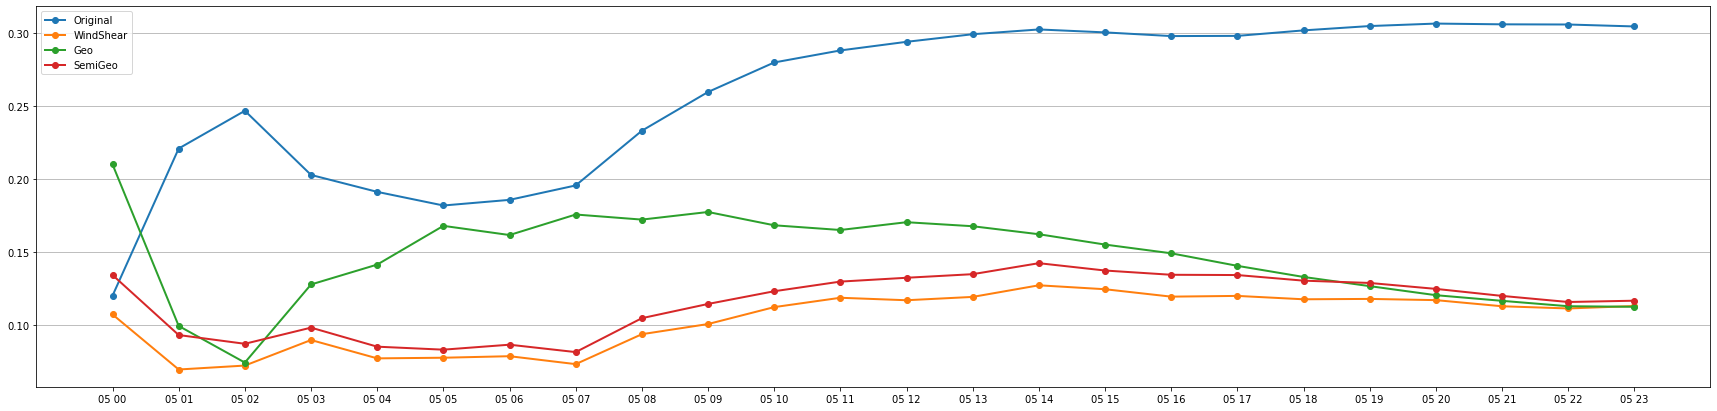

In [60]:
myplot.timelines(original_err["TIME_CET"], {"Original" : original_err["NMAE"], "WindShear" : wsr_err["NMAE"], "Geo" : geo_err["NMAE"], "SemiGeo" : semigeo_err["NMAE"],}, save_name=path+"Model_compare_NMAE_1d.png")

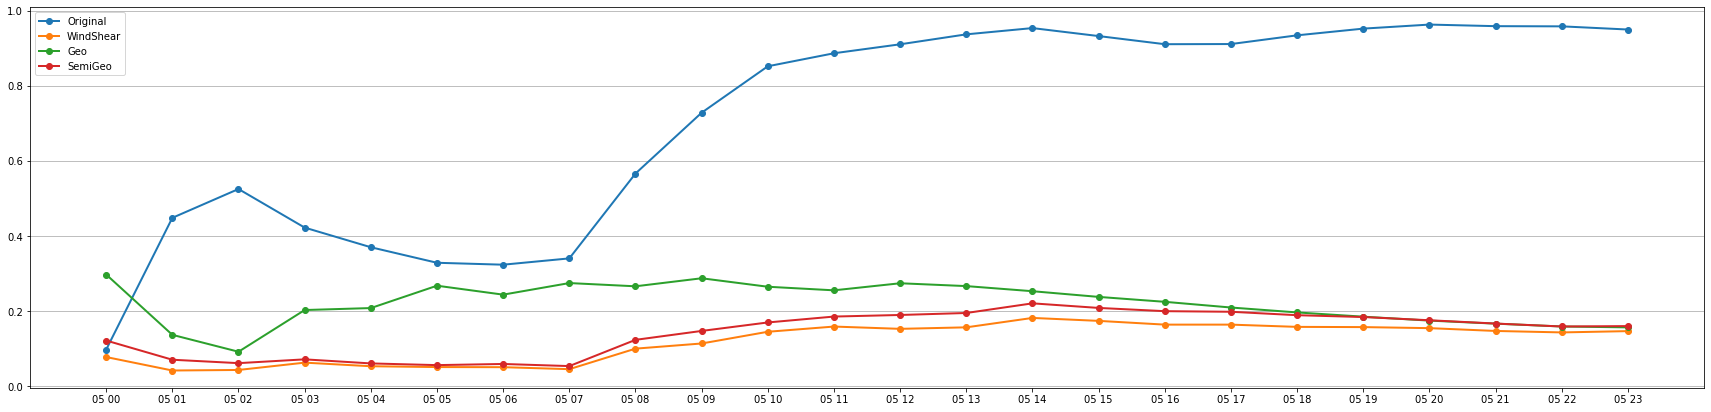

In [61]:
myplot.timelines(original_err["TIME_CET"], {"Original" : original_err["NMSE"], "WindShear" : wsr_err["NMSE"], "Geo" : geo_err["NMSE"], "SemiGeo" : semigeo_err["NMSE"],}, save_name=path+"Model_compare_NMSE_1d.png")

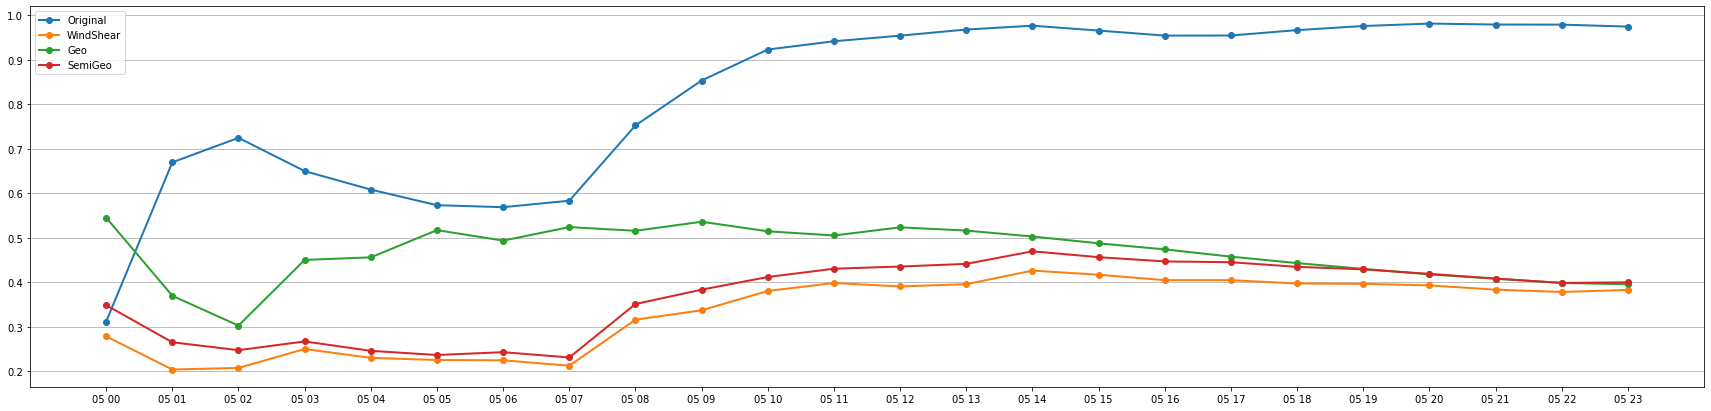

In [58]:
myplot.timelines(original_err["TIME_CET"], {"Original" : original_err["NRMSE"], "WindShear" : wsr_err["NRMSE"], "Geo" : geo_err["NRMSE"], "SemiGeo" : semigeo_err["NRMSE"],}, save_name=path+"Model_compare_NRMSE_1d.png")

### Plot Prediction

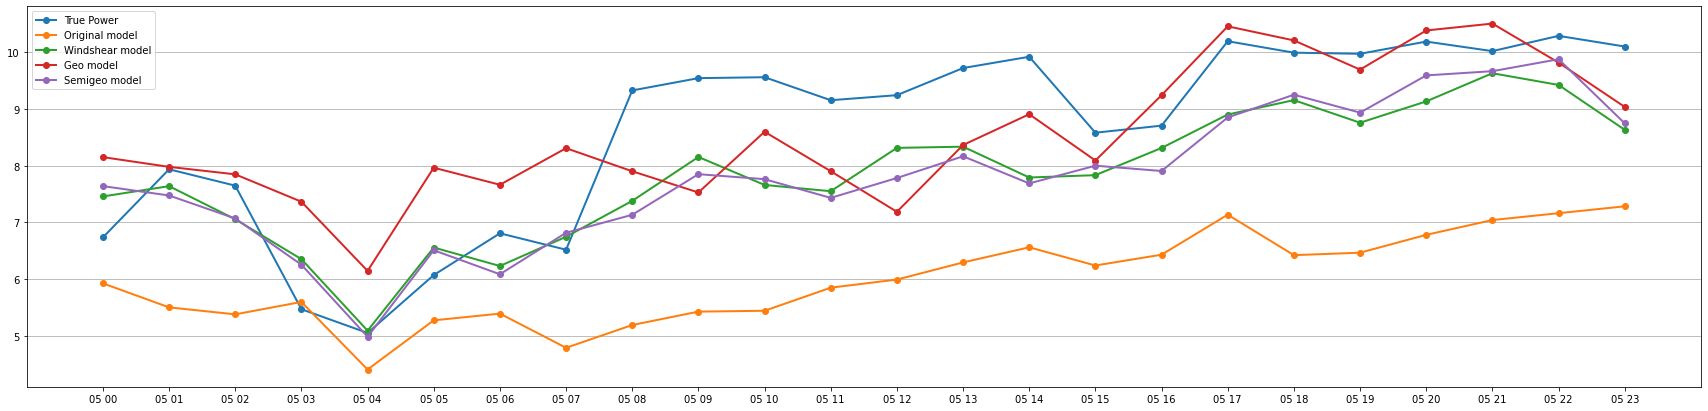

In [109]:
timelines(original_err["TIME_CET"], {"True Power" : original_err["VAERDI"], "Original model" : original_err["pred"], "Windshear model" : wsr_err["pred"], "Geo model" : geo_err["pred"], "Semigeo model" : semigeo_err["pred"]}, save_name=path+"Model_predict_1d.png")

## 2ds, 48hours

In [104]:
date_s = pd.to_datetime("2019-03-01")
date_e = pd.to_datetime("2019-03-03")
df_evl_2d = df_evl[df_evl["TIME_CET"] >= date_s][df_evl["TIME_CET"] < date_e].sort_values(["TIME_CET"]).reset_index(drop=True)

### 4 Models evaluation

In [105]:
original_err = model_evaluation(df_evl_2d, org_cols, model_original, save_name=path+"original_error_2d.csv")
wsr_err = model_evaluation(df_evl_2d, wsr_cols, model_wsr, save_name=path+"wsr_error_2d.csv")
geo_err = model_evaluation(df_evl_2d, geo_cols, model_geo, save_name=path+"geo_error_2d.csv")
semigeo_err = model_evaluation(df_evl_2d, semigeo_cols, model_semigeo, save_name=path+"semigeo_error_2d.csv")

#### Model Comparement

In [90]:
imp, r2 = model_improvement({"Original": original_err, "Windshear": wsr_err, "Geo": geo_err, "Semigeo": semigeo_err})
r2

{'Original': -5.235, 'Windshear': -0.456, 'Geo': -0.229, 'Semigeo': -0.565}

### Plot Error

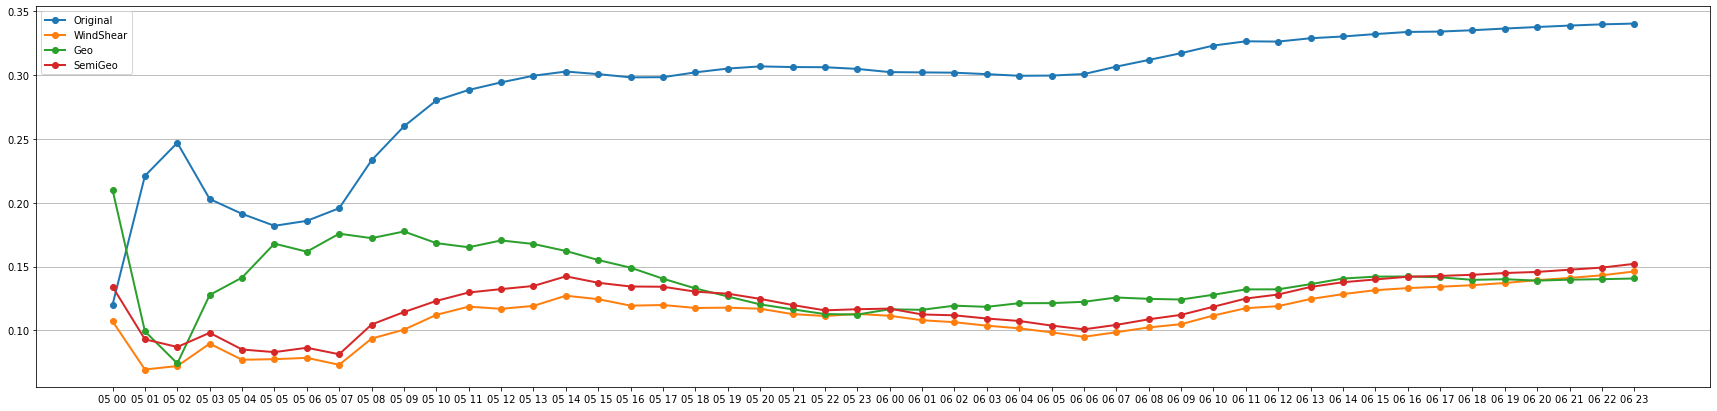

In [91]:
myplot.timelines(original_err["TIME_CET"], {"Original" : original_err["NMAE"], "WindShear" : wsr_err["NMAE"], "Geo" : geo_err["NMAE"], "SemiGeo" : semigeo_err["NMAE"]}, save_name=path+"Model_compare_NMAE_2d.png")

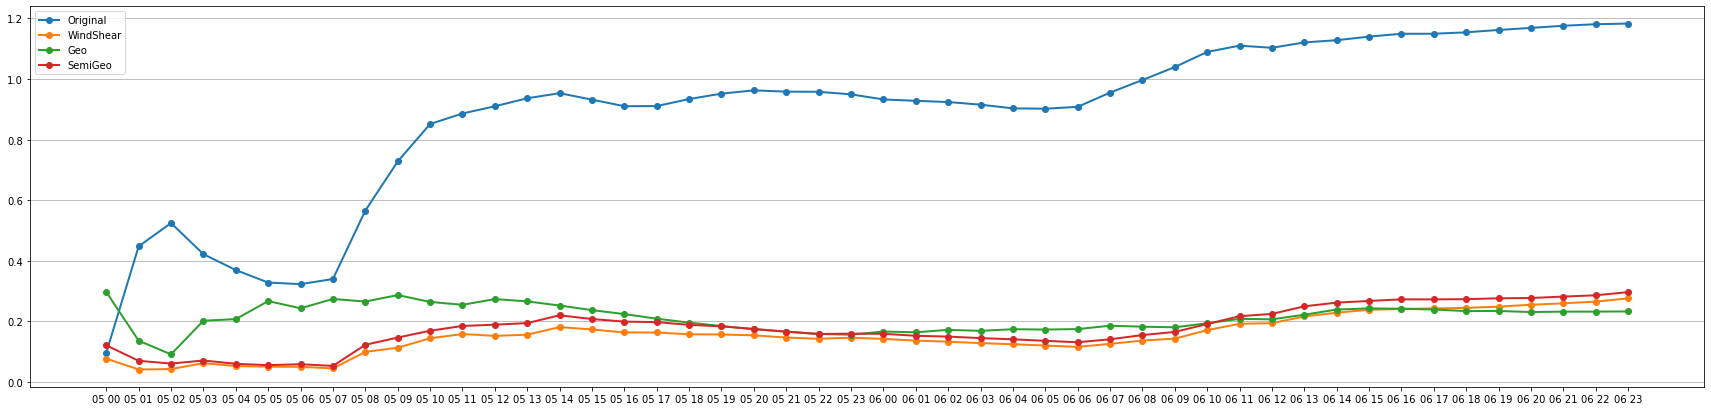

In [92]:
myplot.timelines(original_err["TIME_CET"], {"Original" : original_err["NMSE"], "WindShear" : wsr_err["NMSE"], "Geo" : geo_err["NMSE"], "SemiGeo" : semigeo_err["NMSE"]}, save_name=path+"Model_compare_NMSE_2d.png")

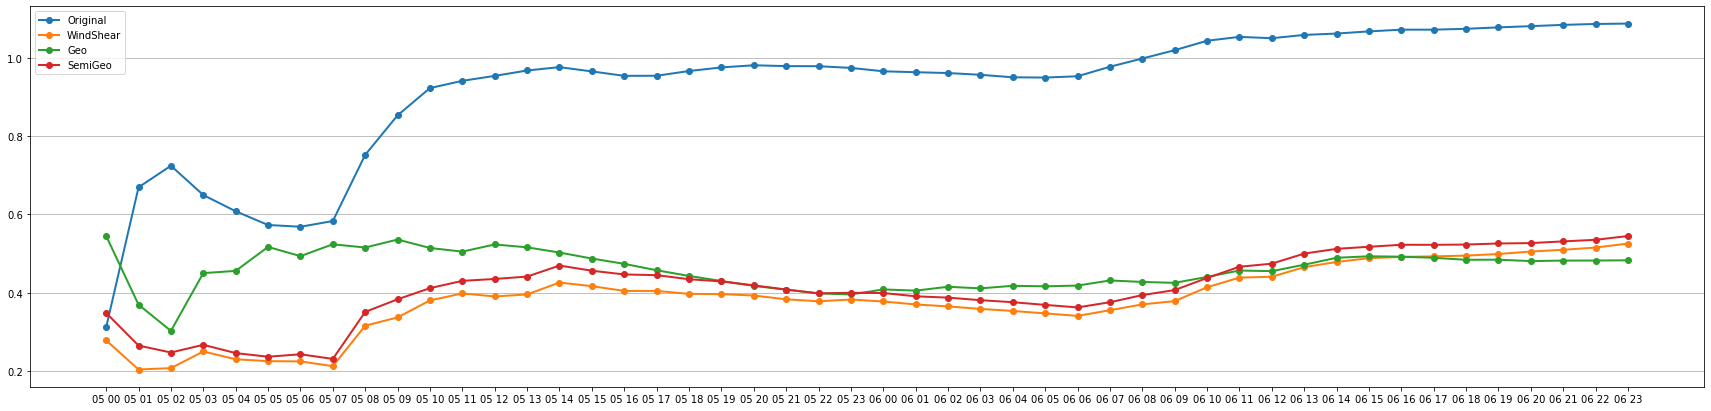

In [94]:
myplot.timelines(original_err["TIME_CET"], {"Original" : original_err["NRMSE"], "WindShear" : wsr_err["NRMSE"], "Geo" : geo_err["NRMSE"], "SemiGeo" : semigeo_err["NRMSE"]}, save_name=path+"Model_compare_RNMSE_2d.png")

### Plot Prediction

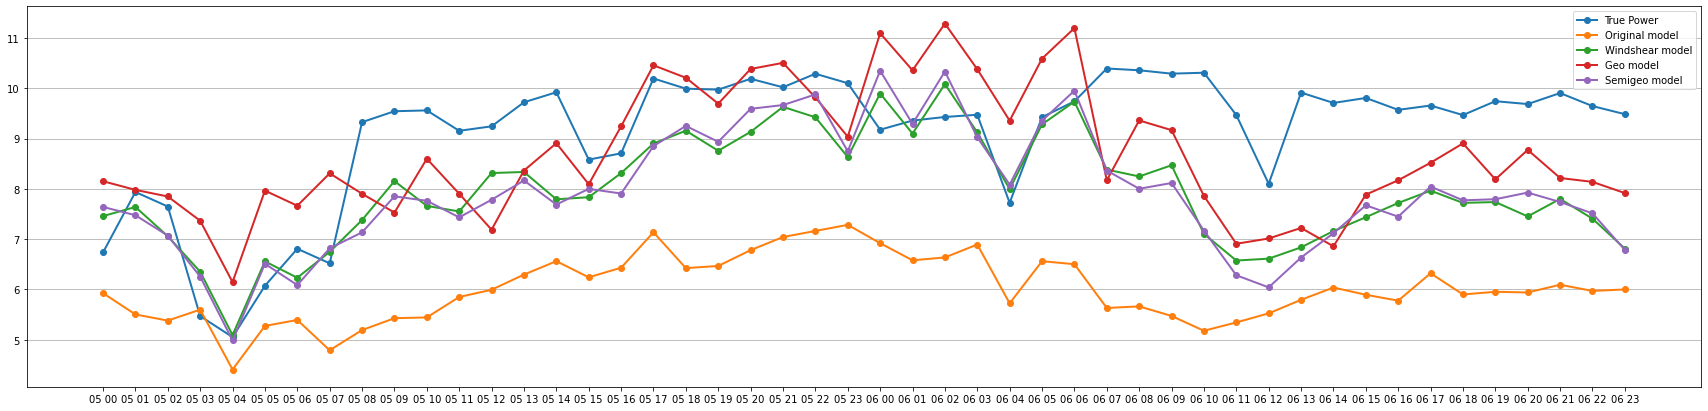

In [106]:
timelines(original_err["TIME_CET"], {"True Power" : original_err["VAERDI"], "Original model" : original_err["pred"], "Windshear model" : wsr_err["pred"], "Geo model" : geo_err["pred"], "Semigeo model" : semigeo_err["pred"]}, save_name=path+"Model_predict_2d.png")

## 5ds, 120hours

In [96]:
date_s = pd.to_datetime("2019-03-01")
date_e = pd.to_datetime("2019-03-05")
df_evl_5d = df_evl[df_evl["TIME_CET"] >= date_s][df_evl["TIME_CET"] < date_e].sort_values(["TIME_CET"]).reset_index(drop=True)

### 4 Models evaluation

In [97]:
original_err = model_evaluation(df_evl_5d, org_cols, model_original, save_name=path+"original_error_5d.csv")
wsr_err = model_evaluation(df_evl_5d, wsr_cols, model_wsr, save_name=path+"wsr_error_5d.csv")
geo_err = model_evaluation(df_evl_5d, geo_cols, model_geo, save_name=path+"geo_error_5d.csv")
semigeo_err = model_evaluation(df_evl_5d, semigeo_cols, model_semigeo, save_name=path+"semigeo_error_5d.csv")

#### Model Comparement

In [98]:
imp, r2 = model_improvement({"Original": original_err, "Windshear": wsr_err, "Geo": geo_err, "Semigeo": semigeo_err})
r2

{'Original': -4.262, 'Windshear': -1.394, 'Geo': 0.147, 'Semigeo': -1.803}

### Plot Error

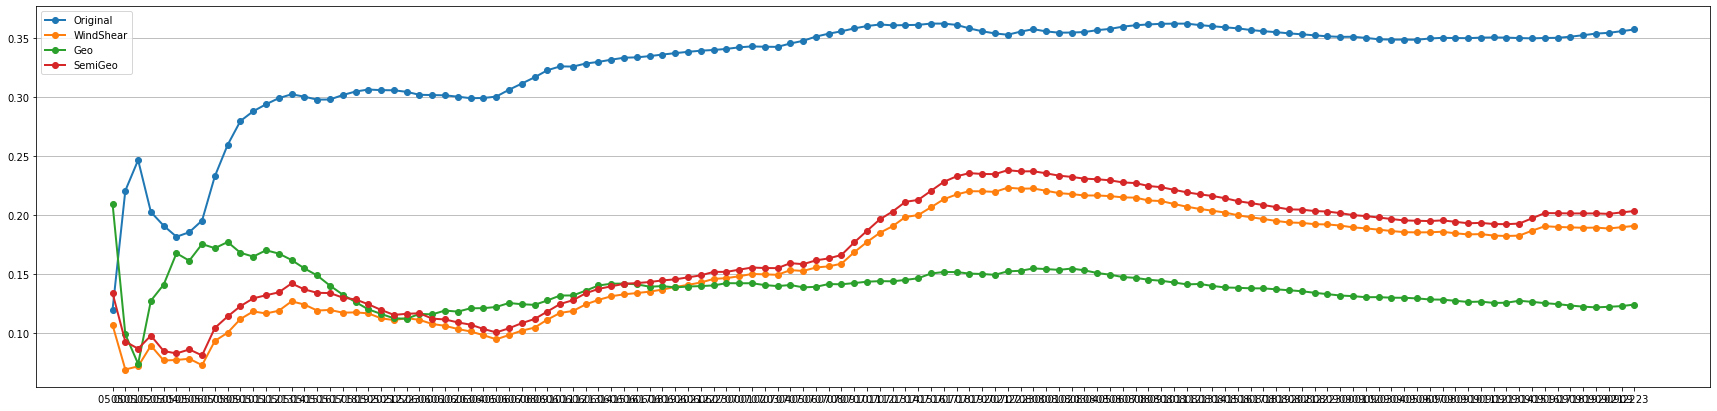

In [99]:
myplot.timelines(original_err["TIME_CET"], {"Original" : original_err["NMAE"], "WindShear" : wsr_err["NMAE"], "Geo" : geo_err["NMAE"], "SemiGeo" : semigeo_err["NMAE"]}, save_name=path+"Model_compare_NMAE_5d.png")

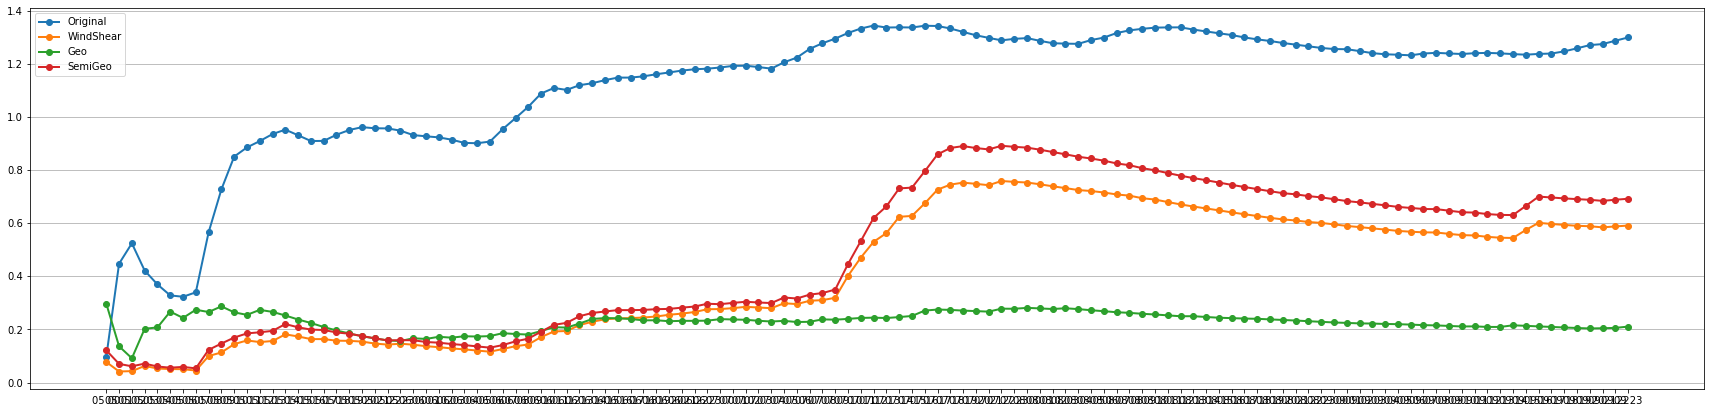

In [100]:
myplot.timelines(original_err["TIME_CET"], {"Original" : original_err["NMSE"], "WindShear" : wsr_err["NMSE"], "Geo" : geo_err["NMSE"], "SemiGeo" : semigeo_err["NMSE"]}, save_name=path+"Model_compare_NMSE_5d.png")

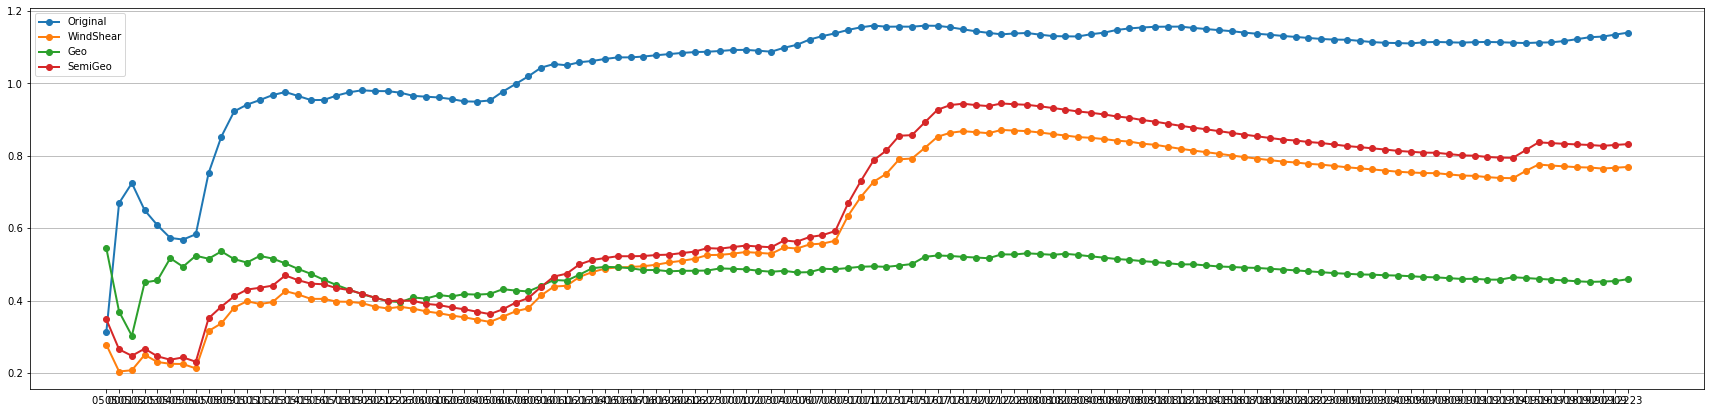

In [101]:
myplot.timelines(original_err["TIME_CET"], {"Original" : original_err["NRMSE"], "WindShear" : wsr_err["NRMSE"], "Geo" : geo_err["NRMSE"], "SemiGeo" : semigeo_err["NRMSE"]}, save_name=path+"Model_compare_RNMSE_5d.png")

### Plot Prediction

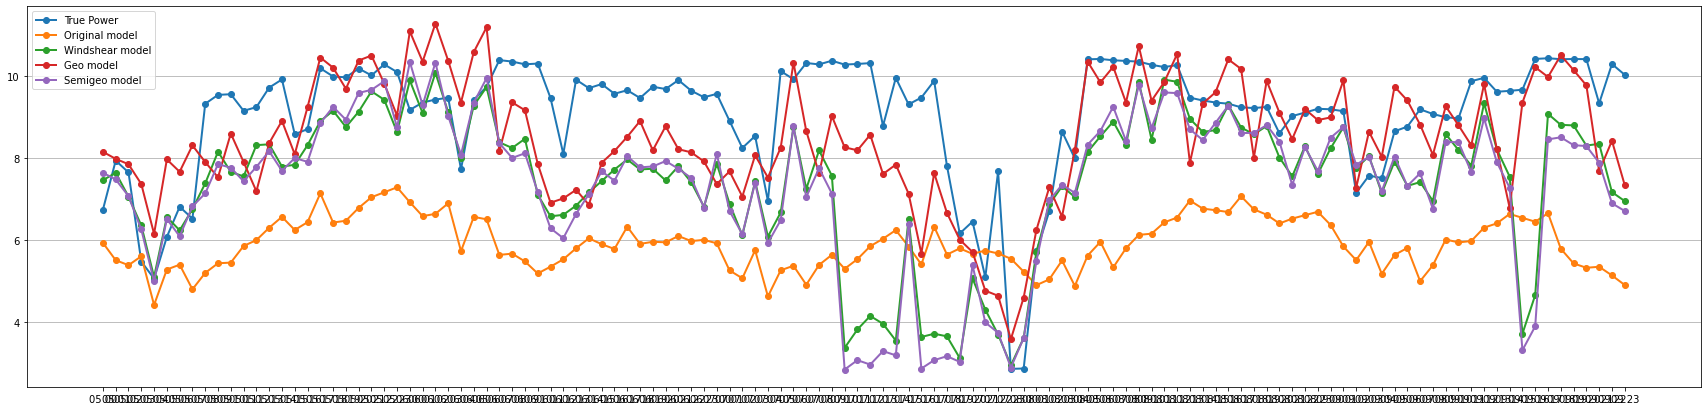

In [103]:
timelines(original_err["TIME_CET"], {"True Power" : original_err["VAERDI"], "Original model" : original_err["pred"], "Windshear model" : wsr_err["pred"], "Geo model" : geo_err["pred"], "Semigeo model" : semigeo_err["pred"]}, save_name=path+"Model_predict_5d.png")